# Fundamentals of Data Analysis
Project notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: [mizydorek](https://github.com/mizydorek/Fundamentals-of-Data-Analysis-Project-2020)

***

#### Project Description

*Perform and explain simple linear regression using Python on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

>##### Model
>
>*Train a model based on the power production data that includes the wind speed and the power output by fitting simple linear regression to accurately predict a power output of wind turbine. By training a model that it can give an estimate on how much it can generate power output based on the wind speed value.* 

#### Introduction to Dataset

#### — *Packages*

In [2]:
# Numerical arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd 

# Plotting.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# import Scipy.stats package.
import scipy.stats as ss

# plot settings.
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,9]

# Set your custom color palette
colors = ["#495057", "#212529", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

#### — *Load Dataset*

In [3]:
# Import dataset.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

#### — *Preview of dataset*

In [4]:
# Overwiew of dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [5]:
# Shape of dataset.
df.shape

(500, 2)

In [6]:
# Have a look at some basic statistical details.
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### — *Standard Missing values*

In [7]:
# checks if dataset contains any missing values
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
df.isnull().sum().sum()

0

#### — *Non-Standard Missing values*

In [8]:
# checks if dataset contains any missing values according to specified list
# https://stackoverflow.com/questions/43424199/display-rows-with-one-or-more-nan-values-in-pandas-dataframe
missing_values=['n/a', 'na', '--', ' ']
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', na_values=missing_values)
df.isna().sum().sum()

0

#### — *Negative values*

In [9]:
# checks if dataset contains any negative values
df[(df.speed < 0) & (df.power < 0)].sum().sum()

0.0

#### — *Correlation*

In [10]:
# Display correlation between two features.
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


From a quick preview of dataset can be seen that dataset contains 500 rows and two columns with entries for wind and power outputs displayed accordingly in meters per second (m/s) and kilowatt-hour (kWh). There is no standard, non-standard or negative values in dataset. It can also be observed that at the tail of the dataset where wind speed is max out there are zero values in power column. Let's make some plots to identify outliers.

#### — *Plots*

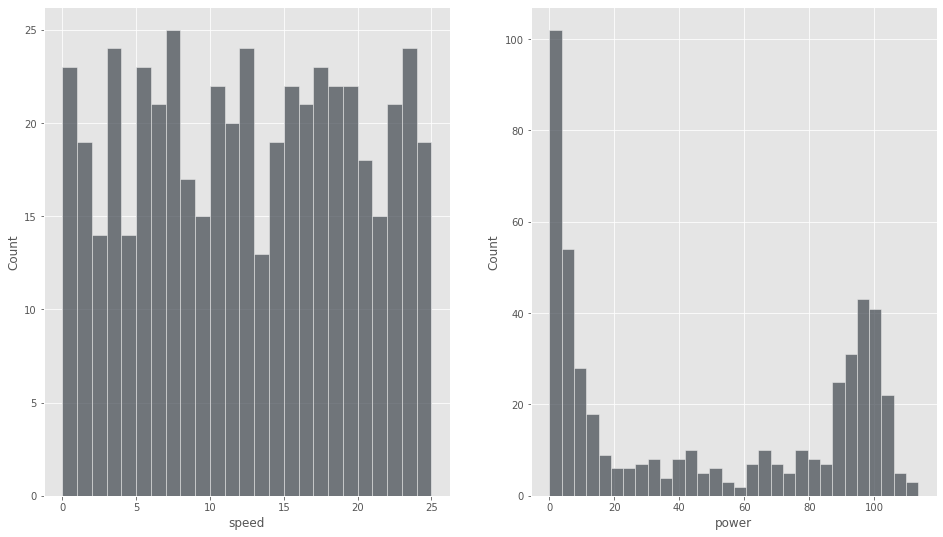

In [11]:
# check how the distribution looks like for speed and power column using hist plot.
fig, ax =plt.subplots(1,2)
sns.histplot(data=df, x="speed", bins=25, ax=ax[0]);
sns.histplot(data=df, x="power", bins=30, ax=ax[1]);

*Worth noting that there is a high volume of variables in a first section (0-5) of power output.*

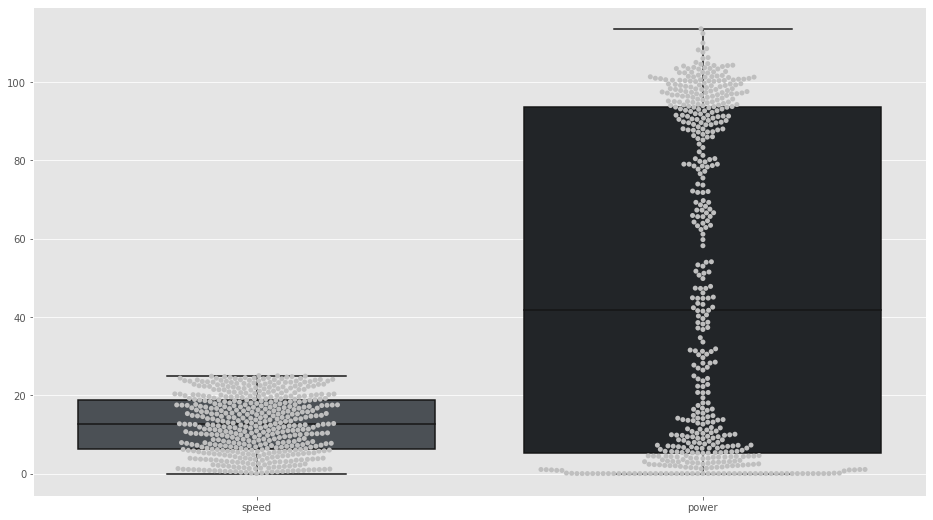

In [12]:
# Box plots are very useful to provide a visual summary of the data that enabling to identify outliers, 
# the dispersion of data set and shows if data is normally distributed or skewed.
sns.boxplot(data=df);
sns.swarmplot(data=df, color=".75");

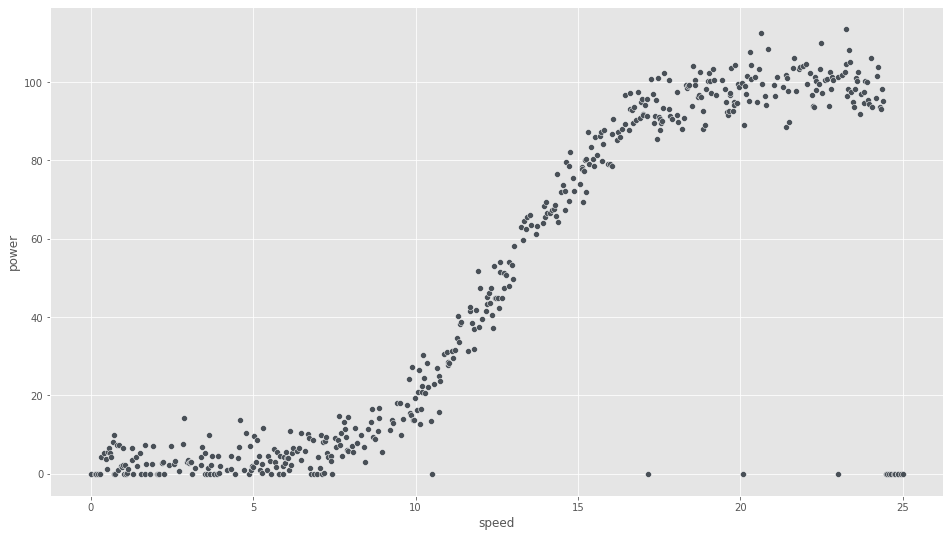

In [13]:
# Scatter plot clearly shows that we have some outliers.
sns.scatterplot(data=df, x='speed', y='power');

##### — Assumption

Taking into consideration the output from data preview and what can be observed at the scatter plot some assumption has to be made. Power turbine has to generate some power output above certain level apart from wind direction and air density which are not included in dataset so will not be taken into the consideration. Based on given dataset that includes wind speed and power output generated by power turbine, one seems to be a sweet spot. 


#### Preprocessing of dataset

In [14]:
# let's remove the outliers according to assumption made above 
# finding on how to remove rows based on a conditional expression
# https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving
df = df.drop(df[(df.speed > 1) & (df.power == 0)].index).reset_index(drop=True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,448,449,450,451,452,453,454,455,456,457
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,23.974,24.024,24.049,24.174,24.199,24.249,24.299,24.349,24.374,24.399
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,94.270,105.992,93.524,95.869,101.419,103.700,93.694,93.078,98.223,95.117


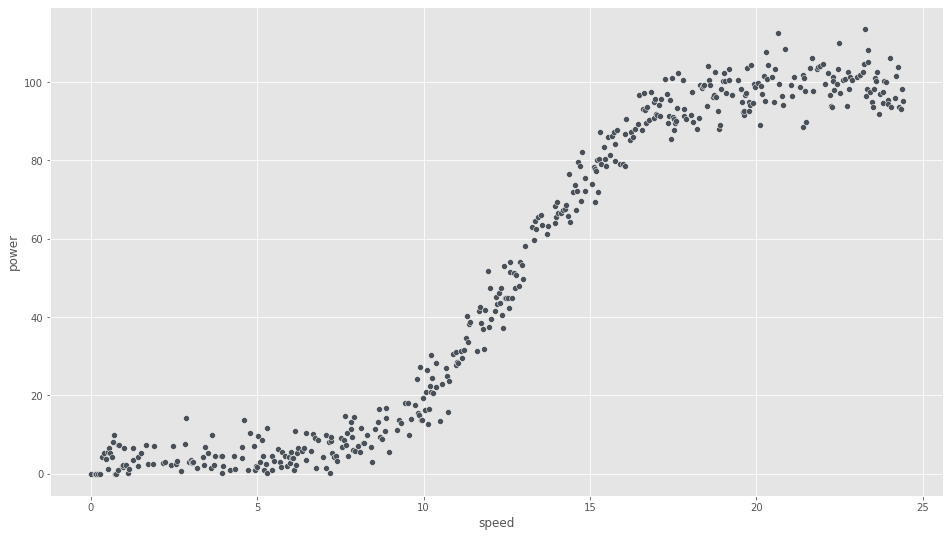

In [15]:
# plot of newly created dataset 
sns.scatterplot(data=df, x='speed', y='power');

####  Linear Regression

Simple linear regression is a linear regression model that examines the linear relationship between two quantitative variables by fitting a linear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 

![Linear Regression](https://miro.medium.com/max/688/0*Yfz5JM6W3a36FLD8.png)

A relationship between variables $y$ and $x$ is represented by equation:

$$y = m x + c$$

where $y$ is the dependent variable that will be estimate, $x$ is the independent variable that is used to make predictions, $m$ is the slope of the regression line and $c$ is a constant also known $y$ intercept (the value of $y$ when $x$ = 0).

In [16]:
# Convert speed and power columns to numpy arrays.
x = df['speed'].to_numpy()
y = df['power'].to_numpy()

In [17]:
# Calculate the optimal values for m and c.
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# Calculate mean of x and y.
x_mean = np.mean(x)
y_mean = np.mean(y)

# Substract mean from x and y.
x_ = x - x_mean
y_ = y - y_mean

# Calculate the best m.
m = np.sum(x_ * y_) / np.sum(x_ * x_)
# Use m to calculate c.
c = y_mean - m * x_mean

print('The coefficient is {} \nThe intercept is {}'.format(m,c))

The coefficient is 5.547494007060821 
The intercept is -18.648297943832297


##### — Cost Function

A cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y.


$$ E = \frac{1}{n}\sum_{i=0}^n (y_i - (mx_i + c))^2$$

where $n$ is the total number of observations (data points), $\sum$ is a sum over all points, $y_i$ is the actual value of an observation and $mx_i + b$ is our prediction.

##### —
[Cost Function](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#:~:text=Cost%20function,-The%20prediction%20function&text=MSE%20measures%20the%20average%20squared,our%20current%20set%20of%20weights)


In [18]:
# Calculate the cost of the line.
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2/len(x) for i in range(x.size)])

In [19]:
print("Cost equals {:.4f} with and m = {:.4f} c = {:.4f}".format(cost(m, c), m, c))

Cost equals 168.4657 with and m = 5.5475 c = -18.6483


##### — Best Fit Line

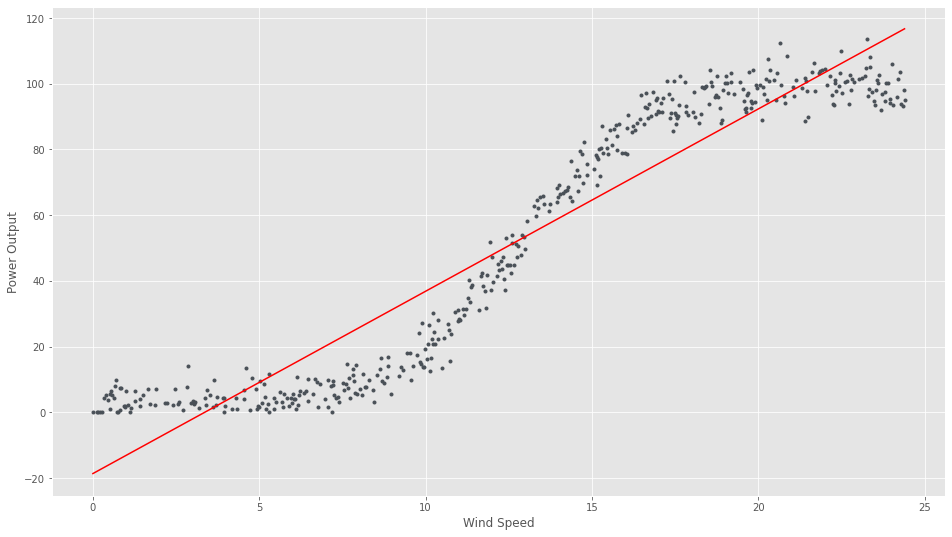

In [20]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, m * x + c, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

####  Polynomial Regression

Polynomial regression is a form of regression analysis that examines the relationship between two quantitative variables by fitting a nonlinear equation that, as accurately as possible, predicts the dependent variable values based on function of the independent variable. 

In [21]:
# Calculate the optimal values for m and c using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
m, c = np.polyfit(x, y, 1)

# Have a look at the m and c variables.
print('The coefficient is {} \nThe intercept is {}'.format(m,c))

The coefficient is 5.547494007060822 
The intercept is -18.648297943832294


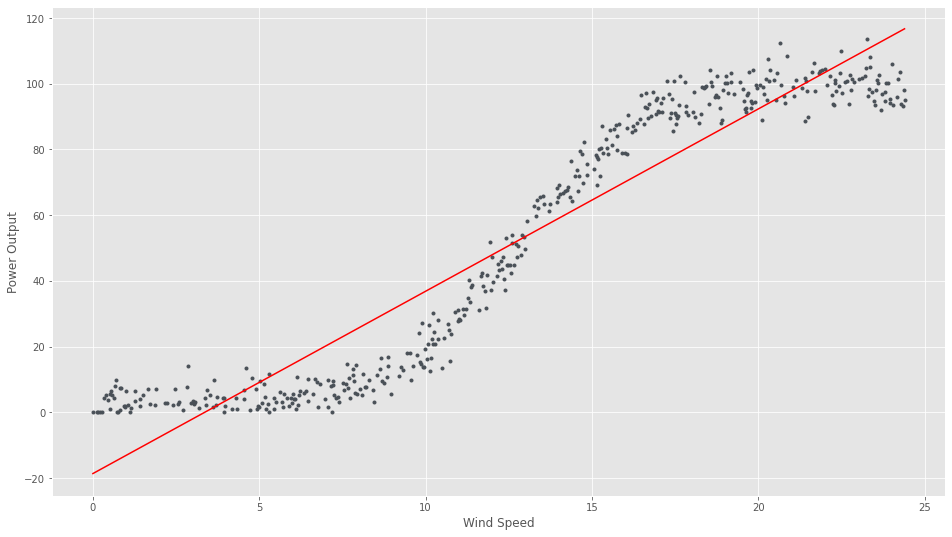

In [22]:
# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, m * x + c, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

In [23]:
# Calculate the second degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 2)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2]))

The first coefficient is 0.035212457107611964 
The second coefficient is 4.672869493618487 
The intercept is -14.924638091909122


#### — Second degree Polynomial

$ y = ax^2 + bx + c$

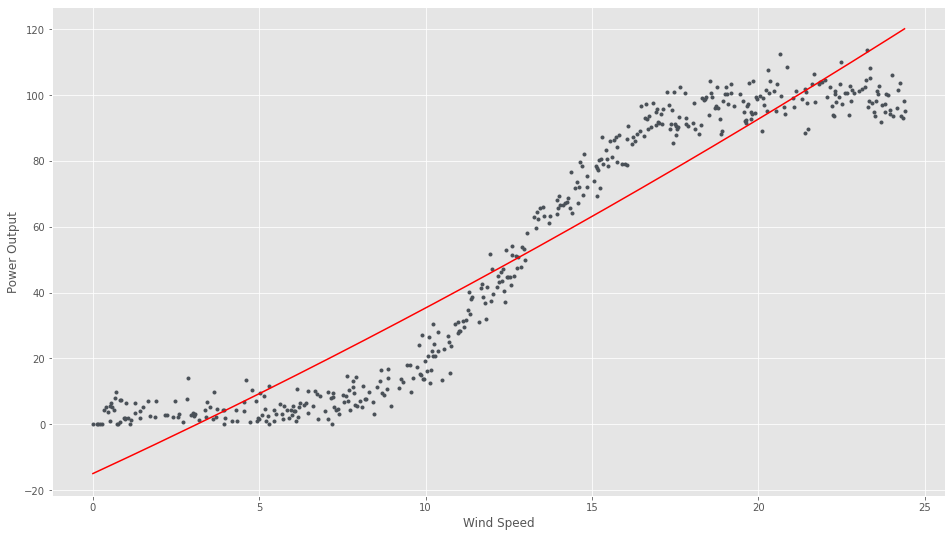

In [24]:
# Assign data to 𝑦=𝑎𝑥2+𝑏𝑥+𝑐
y2 = coeff[0] * x**2 + coeff[1] * x + coeff[2]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y2, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Third degree Polynomial

In [25]:
# Calculate the third degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 3)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2], coeff[3]))

The first coefficient is -0.039535456304476156 
The second coefficient is 1.4944546405062507 
The third coefficient is -9.689468489093628 
The intercept is 14.118357500296346


$ y = ax^3 + bx^2 + cx + d$

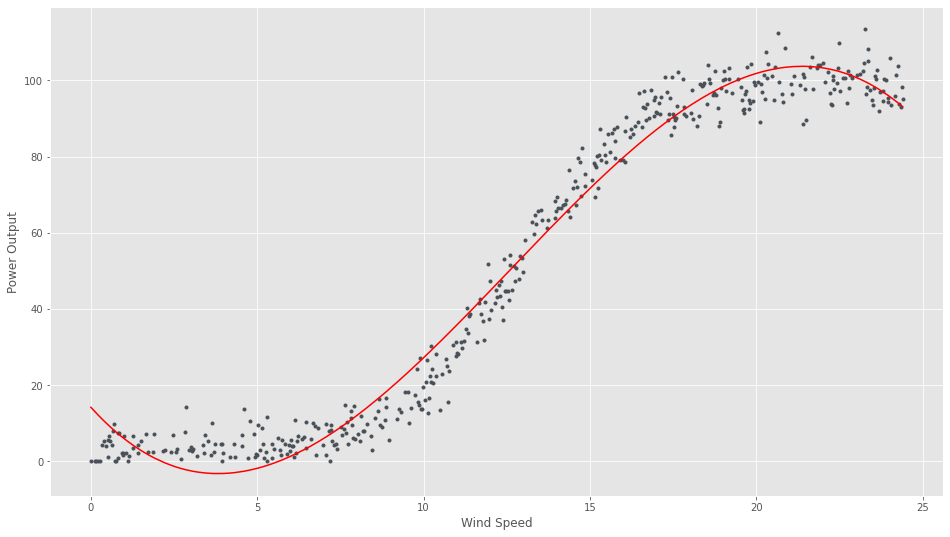

In [26]:
# Assign data to 𝑦=𝑎𝑥2+𝑏𝑥+𝑐
y3 = coeff[0] * x**3 + coeff[1] * x**2 + coeff[2] * x + coeff[3]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y3, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Fourth degree Polynomial

In [27]:
# Calculate the fourth degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 4)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The fourth coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2], coeff[3], coeff[4]))

The first coefficient is -0.0008677188752514507 
The second coefficient is 0.0031042485055240393 
The third coefficient is 0.8223911999154583 
The fourth coefficient is -6.062686756595738 
The intercept is 10.008960317206714


$ y = ax^4 + bx^3 + cx^2 + dx + e$

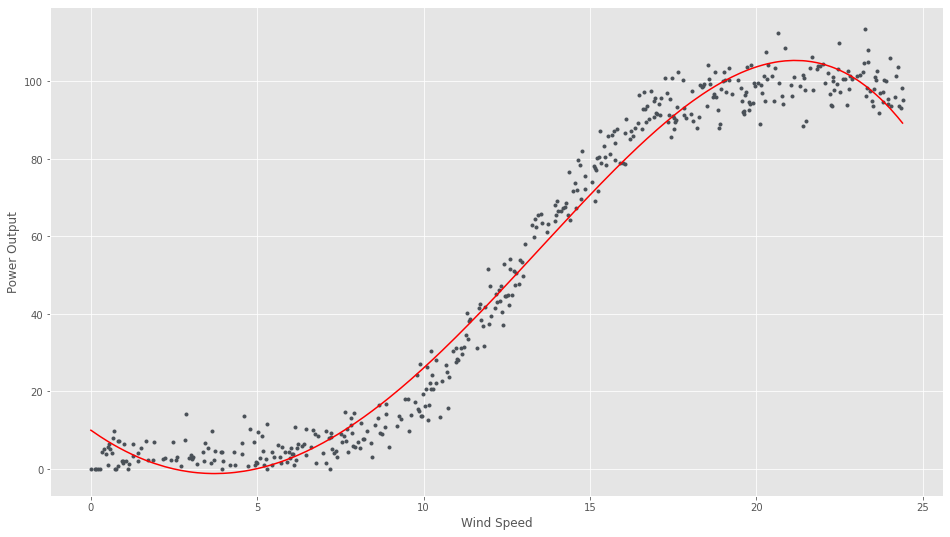

In [28]:
# Assign data to 𝑦=𝑎𝑥2+𝑏𝑥+𝑐
y4 = coeff[0] * x**4 + coeff[1] * x**3 + coeff[2] * x**2 + coeff[3] * x + coeff[4]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y4, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Fifth degree Polynomial

In [29]:
# Calculate the fifth degree polynomial using Numpy polyfit.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Return a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
coeff = np.polyfit(x, y, 5)

# Have a look at the m and c variables.
print('''The first coefficient is {} 
The second coefficient is {} 
The third coefficient is {} 
The fourth coefficient is {}
The fifth coefficient is {} 
The intercept is {}'''.format(coeff[0], coeff[1], coeff[2], coeff[3], coeff[4], coeff[5]))

The first coefficient is 0.00039346498043532006 
The second coefficient is -0.025052126540655813 
The third coefficient is 0.5321461648457688 
The fourth coefficient is -4.061114368209272
The fifth coefficient is 10.98070958764256 
The intercept is -2.66600845658528


$ y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f$

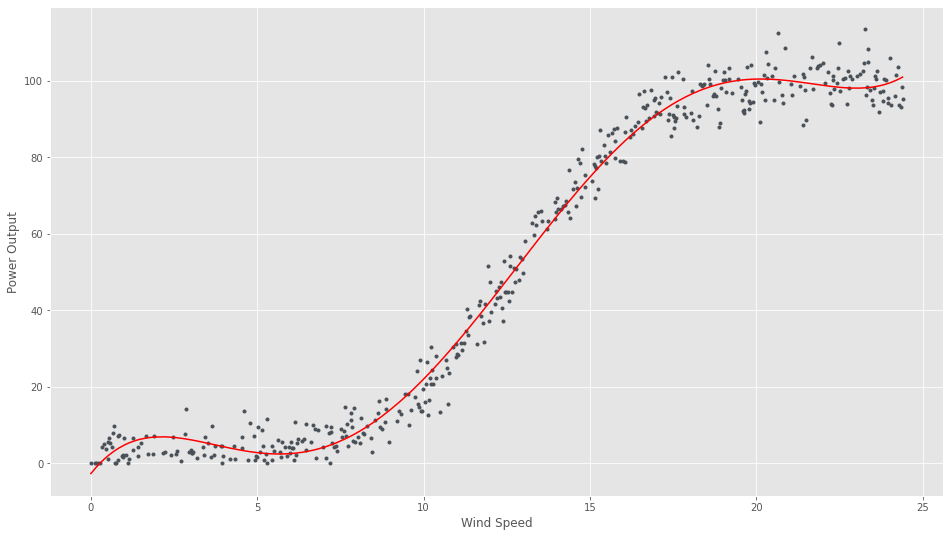

In [30]:
# Assign data.
y5 = coeff[0] * x**5 + coeff[1] * x**4 + coeff[2] * x**3 + coeff[3] * x**2 + coeff[4] * x + coeff[5]

# Plot speed and power and the regression line.
plt.plot(x, y, '.');
plt.plot(x, y5, 'r-')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

#### — Train Test Split

In [34]:
# Using train_test_split() from the scikit-learn library, makes it easy to split dataset into training and testing data.
from sklearn.model_selection import train_test_split

x = x.reshape(-1, 1)

# Script splits the dataset into 75% train data and 25% test data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#### Build and train the model

In [39]:
# Linear Regression Using Scikit Learn.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# import LinearRegression model from Scikit Learn linear model.
from sklearn.linear_model import LinearRegression

# Create a new linear regression model.
model = LinearRegression()

# Fit the data to the model.
model.fit(x_train, y_train)

# Calculate the score/𝑅-squared number
score = model.score(x_train, y_train)

# Coefficient & intercept.
m = model.coef_[0]
c = model.intercept_
print('''The coefficient is {} 
The intercept is {}
The R-squared is {}
The cost is {}'''.format(model.coef_[0], model.intercept_, score, cost(m, c)))

The coefficient is 5.579816841149526 
The intercept is -19.280661209861442
The R-squared is 0.8997620223017813
The cost is 168.56385580023573


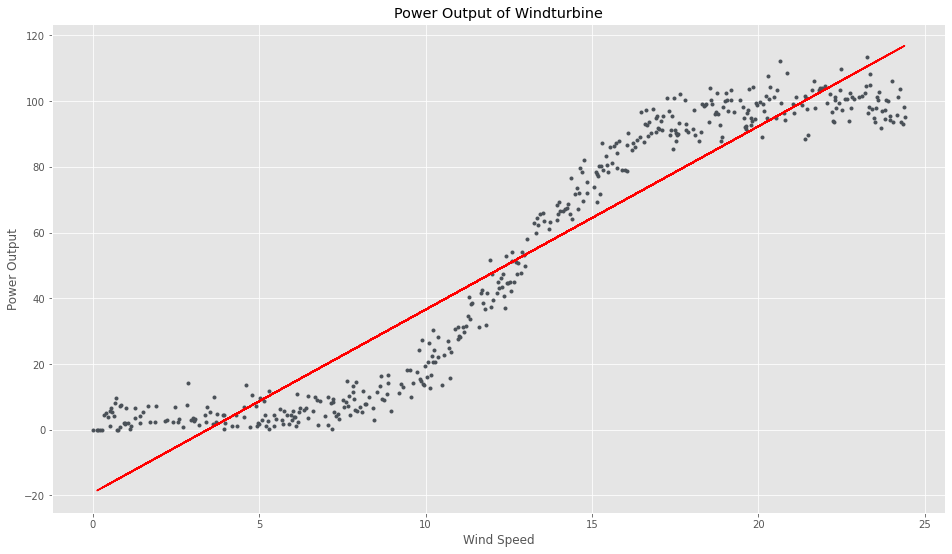

In [38]:
# Predict using the linear model. 
predict = model.predict(x_test)

# Plot speed and power and the regression line.

plt.plot(x, y, '.');
plt.plot(x_test, predict, 'r-')
plt.title('Power Output of Windturbine')
plt.xlabel('Wind Speed')
plt.ylabel('Power Output');

In [73]:
def f(v, p):
    return p[0] + v * p[1]

In [74]:
f(10, p)

array([36.82664213])

### References

[1] — [Simple linear regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

[2] — [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)

[3] — [Yale: Linear regression](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200)

[4] — [Introduction to inference about slope in linear regression](https://www.khanacademy.org/math/ap-statistics/inference-slope-linear-regression/inference-slope/v/intro-inference-slope)



